In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
X = np.array([1, 5, 2, 8, 4, 5]).reshape(-1, 1)
# Output variable
y = np.array([2, 4, 5, 4,6,9])

In [3]:
X.shape, y.shape

((6, 1), (6,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

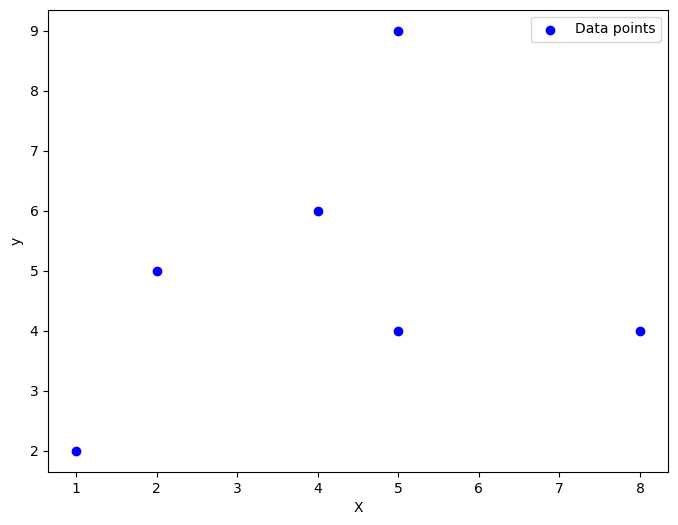

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
# Define polynomial degree
degree = 10

# Regular Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)

# Ridge Regression (L2)
ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_reg.fit(X_train, y_train)

# Lasso Regression (L1)
lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
lasso_reg.fit(X_train, y_train)

/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.22259e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/conda/envs/py39_ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e-01, tolerance: 1.400e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

In [7]:
ridge_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=10)),
  ('ridge', Ridge())],
 'transform_input': None,
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=10),
 'ridge': Ridge(),
 'polynomialfeatures__degree': 10,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

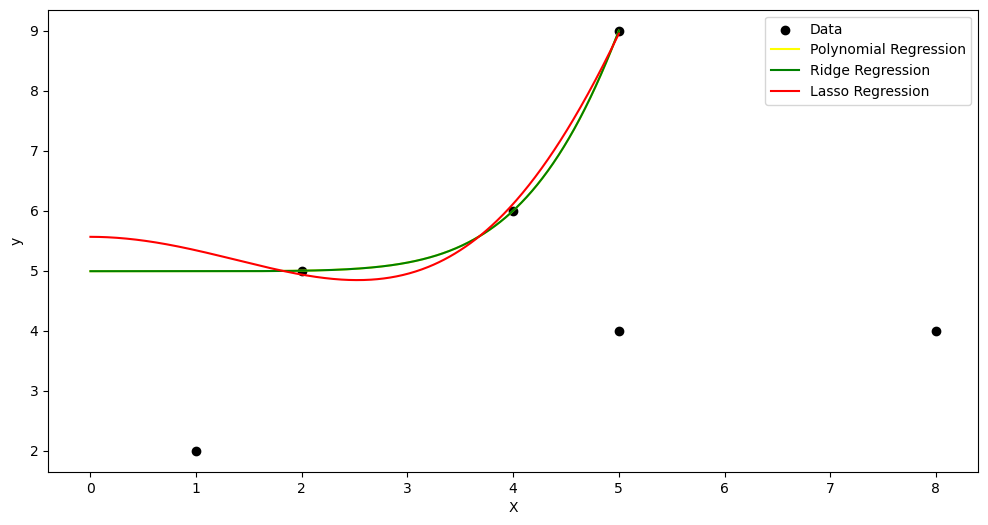

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', label='Data')

X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
plt.plot(X_plot, poly_reg.predict(X_plot), label='Polynomial Regression', color='yellow')
plt.plot(X_plot, ridge_reg.predict(X_plot), label='Ridge Regression', color='green')
plt.plot(X_plot, lasso_reg.predict(X_plot), label='Lasso Regression', color='red')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()